In [1]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.utils import to_categorical

download dataset and split into train , test

In [2]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [4]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

extract two classes from dataset

In [3]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# Define selected classes (airplane=0, automobile=1)
selected_classes = [0, 1]

# Create boolean masks AFTER flattening
train_mask = np.isin(y_train, selected_classes)
test_mask = np.isin(y_test, selected_classes)

# Filter dataset
X_train_binary = X_train[train_mask]
y_train_binary = y_train[train_mask]
X_test_binary = X_test[test_mask]
y_test_binary = y_test[test_mask]

# Normalize the images
X_train_binary = X_train_binary / 255.0
X_test_binary = X_test_binary / 255.0

# One-hot encode the labels
y_train_binary_oh = to_categorical(y_train_binary, num_classes=2)
y_test_binary_oh = to_categorical(y_test_binary, num_classes=2)

visualize the data

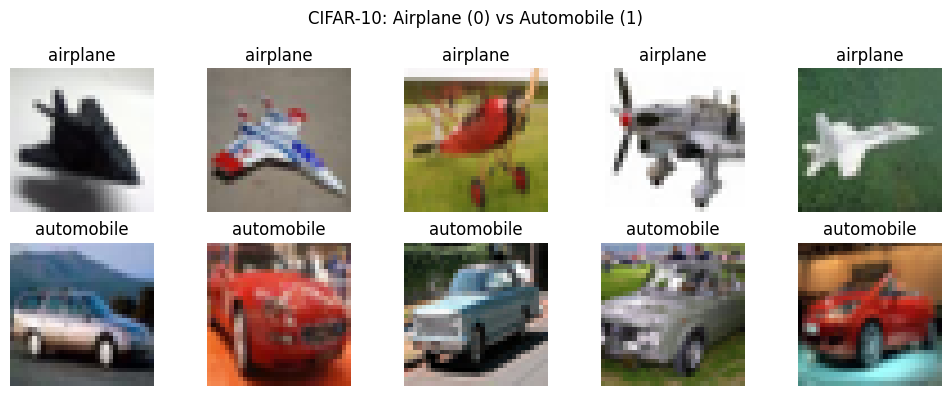

In [4]:
# Step 8: Visualize 5 images from each class
class_names = ['airplane', 'automobile']

plt.figure(figsize=(10, 4))
for class_index in [0, 1]:
    indices = np.where(y_train_binary == class_index)[0]
    for i in range(5):
        plt.subplot(2, 5, class_index * 5 + i + 1)
        plt.imshow(X_train_binary[indices[i]])
        plt.title(class_names[class_index])
        plt.axis('off')

plt.suptitle("CIFAR-10: Airplane (0) vs Automobile (1)")
plt.tight_layout()
plt.show()

model

In [5]:
model= Sequential()
# flatten the image into 1D vector (3072)
model.add(Flatten(input_shape=(32,32,3)))
# first hidden layer
model.add(Dense(512,activation = 'relu'))
# output layer
model.add(Dense(2,activation ='sigmoid'))


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 1,574,402
Trainable params: 1,574,402
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [8]:
model.fit(X_train_binary, y_train_binary_oh, epochs=8, batch_size=64)

Epoch 1/8
157/157 [==============================] - 3s 3ms/step - loss: 0.5399 - accuracy: 0.7608
Epoch 2/8
157/157 [==============================] - 1s 4ms/step - loss: 0.4609 - accuracy: 0.7866
Epoch 3/8
157/157 [==============================] - 1s 3ms/step - loss: 0.4057 - accuracy: 0.8130
Epoch 4/8
157/157 [==============================] - 1s 4ms/step - loss: 0.3902 - accuracy: 0.8216
Epoch 5/8
157/157 [==============================] - 1s 3ms/step - loss: 0.3694 - accuracy: 0.8357
Epoch 6/8
157/157 [==============================] - 1s 4ms/step - loss: 0.3583 - accuracy: 0.8385
Epoch 7/8
157/157 [==============================] - 1s 3ms/step - loss: 0.3435 - accuracy: 0.8487
Epoch 8/8
157/157 [==============================] - 1s 3ms/step - loss: 0.3464 - accuracy: 0.8469


In [9]:
model.evaluate(X_test_binary, y_test_binary_oh)


63/63 [==============================] - 0s 2ms/step - loss: 0.4198 - accuracy: 0.8185


[0.4198080003261566, 0.8184999823570251]

1/1 [==============================] - 0s 59ms/step


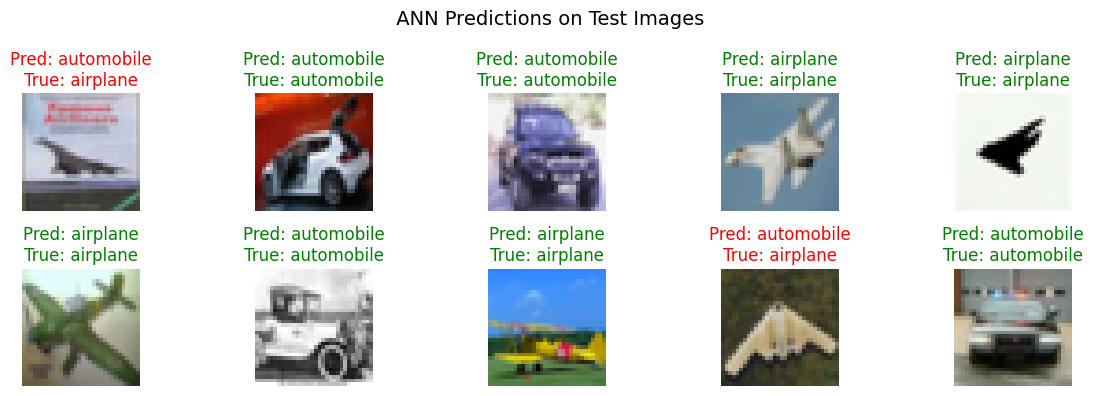

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Predict on first 10 test images
pred_probs = model.predict(X_test_binary[:10])
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = np.argmax(y_test_binary_oh[:10], axis=1)

# Class labels
class_names = ['airplane', 'automobile']

# Plot
plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test_binary[i])
    plt.title(f"Pred: {class_names[pred_classes[i]]}\nTrue: {class_names[true_classes[i]]}",
              color="green" if pred_classes[i] == true_classes[i] else "red")
    plt.axis('off')

plt.suptitle(" ANN Predictions on Test Images", fontsize=14)
plt.tight_layout()
plt.show()
